In [1]:
import os

# Plots
import matplotlib.pyplot as plt
import numpy as np

# import cv2
import torch
import torch.nn as nn
import torchvision


# Utils
from tqdm.notebook import tqdm, trange
from torchinfo import summary

In [2]:
torch.__version__

'2.6.0'

## Utils

# Pytorch API

Package| 	Description|
-|-|
`torch`| 	The top-level PyTorch package and tensor library.
`torch.nn`| 	A subpackage that contains modules and extensible classes for building neural networks.
`torch.autograd`| 	A subpackage that supports all the differentiable Tensor operations in PyTorch.
`torch.nn.functional`| 	A functional interface that contains typical operations used for building neural networks like loss functions, activation functions, and convolution operations.
`torch.optim`| 	A subpackage that contains standard optimization operations like SGD and Adam.
`torch.utils`| 	A subpackage that contains utility classes like data sets and data loaders that make data preprocessing easier.
`torchvision`| 	A package that provides access to popular datasets, model architectures, and image transformations for computer vision. 

# Tensors

## Tensor introduction

To get started with deep learning, we will need to develop a few basic skills. All machine learning is concerned with extracting information from data. So we will begin by learning the practical skills for storing and manipulating data.

To start, we introduce the 𝑛-dimensional array, which is also called the tensor. No matter which framework we use, its tensor class (Tensor in both PyTorch and TensorFlow) is similar to numpy's ndarray with a few useful features. First, GPU is well-supported to accelerate the computation, whereas numpy only supports CPU computation. Second, the tensor class supports automatic differentiation. These properties make the tensor class suitable for deep learning.

Each of these examples are specific instances of the more general concept of a tensor:
- number / scalar
- array / vector
- 2d-array / matrix

Tensors are generalizations: $n$d-arrays

In [3]:
x = torch.tensor([1, 2, 3])
x

tensor([1, 2, 3])

In [4]:
# Dtypes
x = torch.tensor([1, 2, 3], dtype=torch.float32)
x

tensor([1., 2., 3.])

In [5]:
x = torch.tensor(2)
x

tensor(2)

In [6]:
# item returns a value in a standard python type
x.item(), type(x.item())

(2, int)

### Get information about a tensor

In [7]:
print(f"Shape of tensor: {x.shape}")
print(f"Datatype of tensor: {x.dtype}")
print(f"Device tensor is stored on: {x.device}")

Shape of tensor: torch.Size([])
Datatype of tensor: torch.int64
Device tensor is stored on: cpu


### Creating tensors

Like in `numpy`, there are different functions that create tensors.

In [8]:
x = torch.arange(12, dtype=torch.float32)
print(x)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])


In [9]:
x = torch.tensor([1, 2, 3])
x = torch.repeat_interleave(x, 3)  # Repeats each element 3 times
print(x)

tensor([1, 1, 1, 2, 2, 2, 3, 3, 3])


In [10]:
x = torch.ones((2, 3))
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [11]:
x = torch.zeros((3, 3))
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [12]:
# Uniform random of a given shape
x = torch.rand((3, 3))
print(x)

tensor([[0.0698, 0.7244, 0.8097],
        [0.4497, 0.0677, 0.1025],
        [0.1939, 0.6206, 0.4365]])


In [13]:
# Normal random of a given shape
x = torch.randn((3, 3))
print(x)

tensor([[-1.0431, -0.5922,  1.3868],
        [ 0.6318,  1.1443,  1.0961],
        [ 0.2610,  0.0849,  0.7271]])


In [14]:
# Normal distribution with given mean and std
x = torch.normal(mean=10, std=1, size=(2, 3))
print(x)

tensor([[11.1613,  9.8331,  8.3034],
        [ 9.4173, 11.8996, 10.5751]])


### Tensor operations

#### Matrix Operations

In [15]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)

In [16]:
x.shape

torch.Size([2, 3])

In [17]:
print(x.sum())
print(x.sum(axis=0))
print(x.sum(axis=1))

tensor(21.)
tensor([5., 7., 9.])
tensor([ 6., 15.])


In [18]:
x = torch.ones((2, 2))
x * 2, x / 2, x // 2, x + 2, torch.exp(x)

(tensor([[2., 2.],
         [2., 2.]]),
 tensor([[0.5000, 0.5000],
         [0.5000, 0.5000]]),
 tensor([[0., 0.],
         [0., 0.]]),
 tensor([[3., 3.],
         [3., 3.]]),
 tensor([[2.7183, 2.7183],
         [2.7183, 2.7183]]))

Matrix multiplication

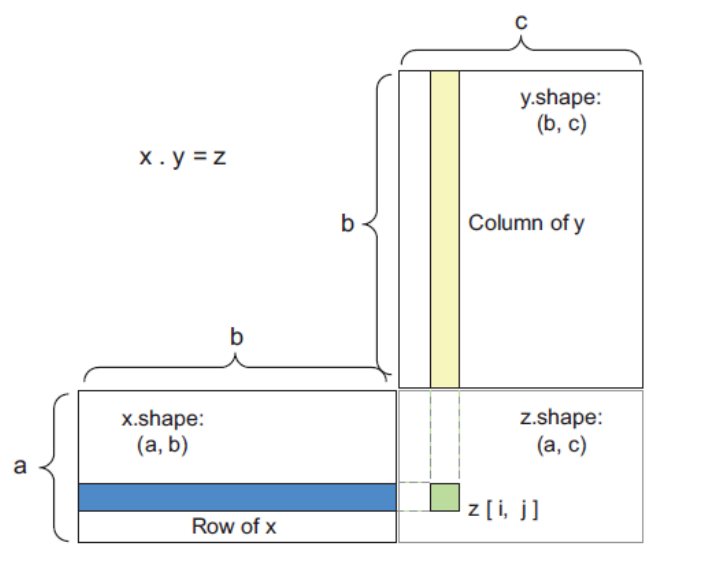

In [19]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)
y = torch.ones((3, 2)) * 2

print(x.shape, y.shape)
print(x.matmul(y))
print(x @ y)

torch.Size([2, 3]) torch.Size([3, 2])
tensor([[12., 12.],
        [30., 30.]])
tensor([[12., 12.],
        [30., 30.]])


In [20]:
# Elementwise multiplication
x * y.T

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

#### Reshape, squeeze, flatten

In [21]:
print(x)
print(x.reshape(3, 2))
print(x.flatten())

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([1., 2., 3., 4., 5., 6.])


In [22]:
print(x, x.shape)
print()
print(x.unsqueeze(0), x.unsqueeze(0).shape)

print(x.unsqueeze(-1), x.unsqueeze(-1).shape)

print(x.unsqueeze(1), x.unsqueeze(1).shape)

tensor([[1., 2., 3.],
        [4., 5., 6.]]) torch.Size([2, 3])

tensor([[[1., 2., 3.],
         [4., 5., 6.]]]) torch.Size([1, 2, 3])
tensor([[[1.],
         [2.],
         [3.]],

        [[4.],
         [5.],
         [6.]]]) torch.Size([2, 3, 1])
tensor([[[1., 2., 3.]],

        [[4., 5., 6.]]]) torch.Size([2, 1, 3])


#### Reshape, squeeze, flatten - einops

In [23]:
from einops import rearrange, reduce, repeat

In [24]:
# Suppose we have 10 images of with 3 colors, height = 32, width = 24 => our tensors should be of shape (10, 3, 32, 24)
x = torch.rand((10, 3, 32, 24))
print(x.shape)
# Let's flatten the height and width into one dimension
res = rearrange(x, "b c h w -> b c (h w)")
print(res.shape)

# Let's flatten everything
res = rearrange(x, "b c h w -> b (c w h)")
print(res.shape)

# Let's switch the height and width
res = rearrange(x, "b c h w -> b c w h")
print(res.shape)

# Let's unsqueeze in the middle somewhere
res = rearrange(x, "b c h w -> b 1 c 1 w h")
print(res.shape)

# Let's repeat all the channels again
res = repeat(x, "b c h w -> b (repeat c) h w", repeat=2)
print(res.shape)

# Let's repeat all the channels again
res = reduce(x, "b c h w -> b h w", reduction="sum")
print(res.shape)

torch.Size([10, 3, 32, 24])
torch.Size([10, 3, 768])
torch.Size([10, 2304])
torch.Size([10, 3, 24, 32])
torch.Size([10, 1, 3, 1, 24, 32])
torch.Size([10, 6, 32, 24])
torch.Size([10, 32, 24])


### Concatenation

In [25]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
y = torch.tensor([[10, 20, 30], [40, 50, 60]])

torch.cat([x, y], dim=0)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [10, 20, 30],
        [40, 50, 60]])

In [26]:
torch.cat([x, y], dim=1)

tensor([[ 1,  2,  3, 10, 20, 30],
        [ 4,  5,  6, 40, 50, 60]])

## Usual tensor dimensions used in practice

1. 2D - Numerical data (Vector data):
- `(num_samples, num_features)`
2. 3D - Time series: 
- `(num_samples, num_timesteps, num_features)`
3. 4D - Image data: 
- `(num_samples, height, width, channels)` or `(channels, num_samples, height, width)`
4. 5D - Video:
- `(num_samples, frames, height, width, channels)`



# Data

## Dataset, DataLoader

- https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`.

In [27]:
from torch.utils.data import DataLoader, Dataset

In [28]:
class MyDataset(Dataset):
    def __init__(self):
        numbers = np.arange(100)
        self.data = numbers

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]

In [29]:
dataset = MyDataset()
print(len(dataset))
print(dataset.data)

100
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [30]:
batch_size = 8
trainloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [31]:
next(iter(trainloader))

tensor([38, 64, 67, 45, 57, 43, 24, 73])

In [32]:
next(iter(testloader))

tensor([0, 1, 2, 3, 4, 5, 6, 7])

# Training

**Videos**
- [DeepLizard playlist](https://www.youtube.com/watch?v=gZmobeGL0Yg&list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU)
- [loss function](https://www.youtube.com/watch?v=QBbC3Cjsnjg)
- [Activation functions](https://www.youtube.com/watch?v=s-V7gKrsels)
- [Optimizers](https://www.youtube.com/watch?v=mdKjMPmcWjY)

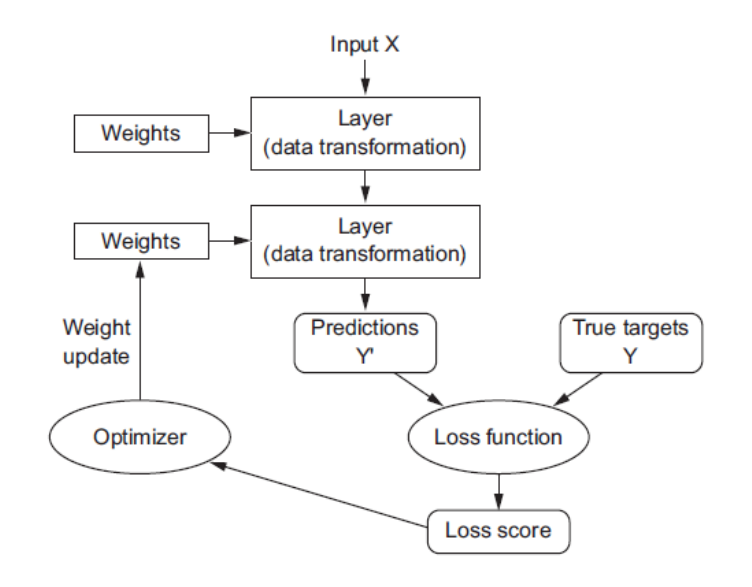

# LR example

To keep things simple, we will construct an artificial dataset
according to a linear model with additive noise.
Our task will be to recover this model's parameters
using the finite set of examples contained in our dataset.
We will keep the data low-dimensional so we can visualize it easily.
In the following code, we generate a dataset
containing $1000$ examples, each consisting of $2$ features
sampled from a standard normal distribution.
Thus, our synthetic dataset will be a matrix
$\boldsymbol{X}\in \mathbb{R}^{1000 \times 2}$.

The true parameters generating our dataset will be
$\boldsymbol{w} = [2, -3.4]^\top$ and $b = 4.2$,
and our synthetic labels will be assigned according
to the following linear model with the noise term $\epsilon$:

$$\boldsymbol{y}= \boldsymbol{X} \boldsymbol{w} + b + \epsilon.$$

We can think of $\epsilon$ as capturing potential
measurement errors on the features and labels.
We will assume that the standard assumptions hold, and thus
that $\epsilon$ obeys a normal distribution with mean of $0$.
To make our problem easy, we will set its standard deviation to $0.01$.
The following code generates our synthetic dataset.

In [33]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = X @ w + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape(-1, 1)

In [34]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
X, y = synthetic_data(true_w, true_b, 1000)

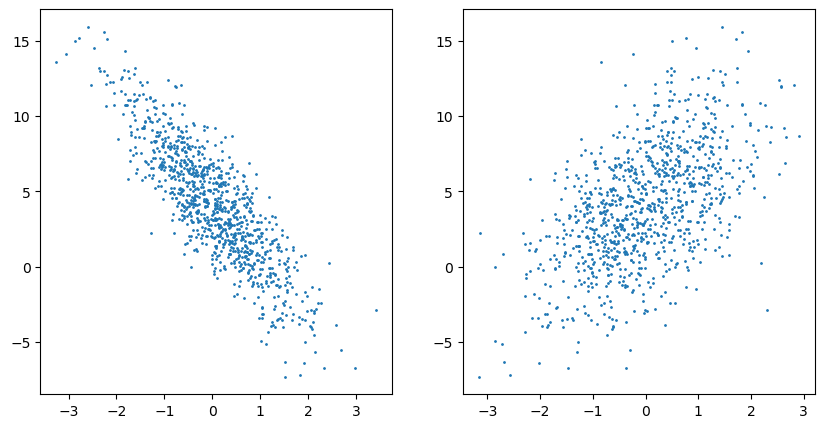

In [35]:
# Scatter first dim
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(X[:, 1].detach().numpy(), y.detach().numpy(), s=1)
axs[1].scatter(X[:, 0].detach().numpy(), y.detach().numpy(), s=1)
plt.show()

In [36]:
class LRDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [37]:
dataset = LRDataset(X, y)
print(len(dataset))

1000


In [38]:
dataset[0]

(tensor([-1.1076, -0.5562]), tensor([3.8641]))

In [39]:
batch_size = 8
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [40]:
next(iter(loader))

[tensor([[ 0.4130, -2.3347],
         [ 0.7231,  1.0117],
         [-0.2622,  0.4575],
         [-1.2655,  0.1778],
         [ 0.2820, -0.9281],
         [-0.8513, -1.6030],
         [-0.5649,  0.2035],
         [ 0.6831,  0.6720]]),
 tensor([[12.9588],
         [ 2.2121],
         [ 2.1196],
         [ 1.0498],
         [ 7.9151],
         [ 7.9523],
         [ 2.3925],
         [ 3.2958]])]

In [41]:
# 3 parameters, 2 weights 1 bias.
layer = nn.Linear(2, 1, bias=True)
print(layer)

Linear(in_features=2, out_features=1, bias=True)


In [42]:
summary(layer)

Layer (type:depth-idx)                   Param #
Linear                                   3
Total params: 3
Trainable params: 3
Non-trainable params: 0

In [43]:
list(layer.parameters())

[Parameter containing:
 tensor([[ 0.6241, -0.3018]], requires_grad=True),
 Parameter containing:
 tensor([0.7039], requires_grad=True)]

The `nn.MSELoss` class computes the *mean squared error* (without the $1/2$ factor).
By default, it returns the average loss over examples.


In [44]:
loss = nn.MSELoss()

Mini-batch stochastic gradient descent is a standard tool
for optimizing neural networks,
and thus PyTorch supports it, alongside a number of
variations of this algorithm, in the `optim` module.
When we instantiate an `SGD` instance, we will specify the parameters to optimize over
(obtainable from our `net` via `net.parameters()`), with a dictionary of hyperparameters
required by our optimization algorithm.
Mini-batch stochastic gradient descent just requires that
we set the value `lr`, which is set to $0.03$ here.

In [45]:
optimizer = torch.optim.SGD(layer.parameters(), lr=0.03)

In [46]:
num_epochs = 3
for epoch in range(num_epochs):
    for xi, yi in loader:
        l = loss(layer(xi), yi)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    l = loss(layer(xi), yi)
    print(f"Epoch {epoch + 1}, Loss {l:f}")

Epoch 1, Loss 0.000070
Epoch 2, Loss 0.000137
Epoch 3, Loss 0.000096


In [47]:
print(layer.weight.data)
print(true_w)
print(layer.bias.data)
print(true_b)

tensor([[ 1.9995, -3.4001]])
tensor([ 2.0000, -3.4000])
tensor([4.2006])
4.2


## MNIST example

In [48]:
from einops import rearrange
from torchvision import transforms
from torchvision.datasets import MNIST

In [49]:
transform = transforms.Compose([transforms.ToTensor()])
train_data = MNIST(
    root=os.path.join("..", "data", "tmp", "mnist"),
    download=True,
    train=True,
    transform=transform,
)
test_data = MNIST(
    root=os.path.join("..", "data", "tmp", "mnist"),
    download=True,
    train=False,
    transform=transform,
)

100%|██████████| 9.91M/9.91M [00:01<00:00, 7.59MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 261kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.63MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.71MB/s]


In [50]:
batch_size = 64
trainloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

torch.Size([64, 1, 28, 28]) torch.Size([64])


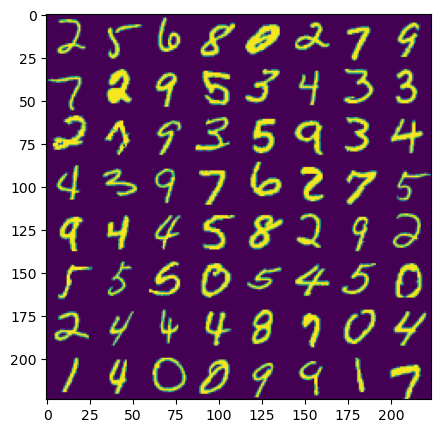

In [51]:
images, labels = next(iter(trainloader))

print(images.shape, labels.shape)

plt.figure(figsize=(5, 5))
plt.imshow(rearrange(images, "(b1 b2) 1 h w -> (b1 h) (b2 w)", b1=8, b2=8))
plt.show()

## Models

In [52]:
from torchinfo import summary

In [53]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [54]:
class Model(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Model, self).__init__()
        # rearrange layer
        self.flatten = nn.Flatten()
        # Hidden layers
        self.fc = nn.Linear(input_dim, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


# Make and use a stronger model

In [55]:
input_shape = 28 * 28  # linear dim
output_shape = 10  # 10 classes
model = Model(input_shape, output_shape)
model.to(device)

Model(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [56]:
model

Model(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [57]:
# See more details about the model, such as the number of parameters
summary(model)

Layer (type:depth-idx)                   Param #
Model                                    --
├─Flatten: 1-1                           --
├─Linear: 1-2                            100,480
├─ReLU: 1-3                              --
├─Linear: 1-4                            1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0

In [58]:
# You can inspect the parameters manually here
for p in model.parameters():
    print(p.shape)
    # print(p)

torch.Size([128, 784])
torch.Size([128])
torch.Size([10, 128])
torch.Size([10])


## Optimizers, loss

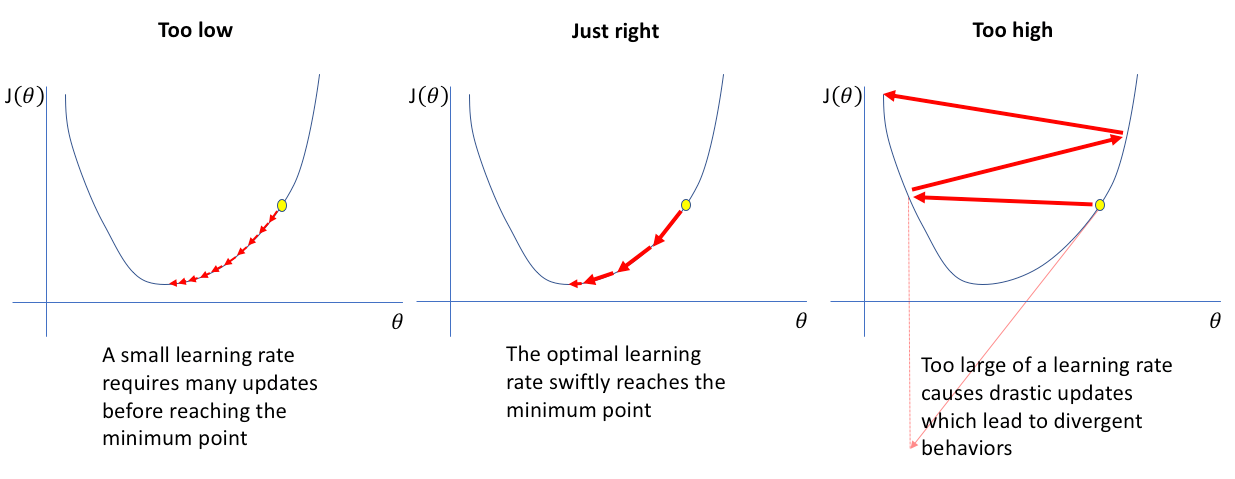

In [59]:
# The learning rate means how fast the model learns.
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# The loss function is dictated by the task and the output type.
# In classification problems we usually use the CrossEntropy loss.
loss_function = nn.CrossEntropyLoss()

## Training

In [60]:
epochs = 5
accs = []
losses = []
model.train()  # Set the model to training mode
for epoch in (bar := trange(epochs)):
    loss_epoch = 0.0
    num_correct = 0
    for X_batch, y_batch in trainloader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        y_pred = model(X_batch)

        loss = loss_function(y_pred, y_batch)

        # Collect info about the epoch
        loss_epoch += loss.item()
        num_correct += torch.sum(torch.argmax(y_pred, axis=1) == y_batch).item()

        # These lines do the "learning" part.
        # The gradients represent how much you need to change the model
        # We zero them because they are kept after each optimization step and
        # we don't want them to accumulate each epochs
        optimizer.zero_grad()
        # We propagate the error through the model
        loss.backward()
        # We adjust the weights
        optimizer.step()

    acc = num_correct / len(trainloader.dataset)
    loss_epoch /= len(trainloader.dataset)
    losses.append(loss_epoch)
    accs.append(acc)
    bar.set_description(f"Loss: {round(loss_epoch, 4), round(acc, 4)}")

  0%|          | 0/5 [00:00<?, ?it/s]

## Evaluate

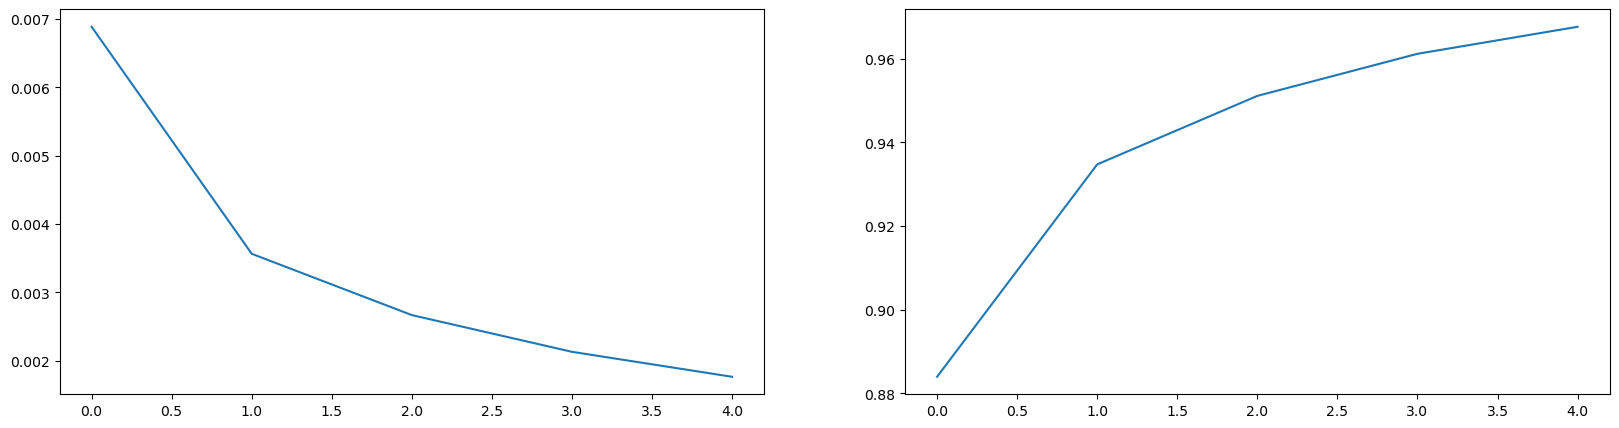

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].plot(losses)
axs[1].plot(accs)

In [62]:
with torch.no_grad():
    model.eval()
    num_correct = 0
    for X_batch, y_batch in testloader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        y_pred = model(X_batch)

        loss = loss_function(y_pred, y_batch)

        # Collect info about the epoch
        loss_epoch += loss.item()
        num_correct += torch.sum(torch.argmax(y_pred, axis=1) == y_batch).item()
    acc = num_correct / len(testloader.dataset)

print(f"test accuracy: {round(acc, 2)}")

test accuracy: 0.97


# Cuda

## Device 

In [63]:
torch.cuda.is_available()

True

In [64]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


In [65]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='NVIDIA GeForce GTX 1050 Ti', major=6, minor=1, total_memory=4095MB, multi_processor_count=6, uuid=21e18409-8233-169f-b526-f9fb7495ad9e, L2_cache_size=1MB)

In [66]:
torch.cuda.device_count()

1

## Memory

In [67]:
print(torch.cuda.memory_summary(abbreviated=True))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  17487 KiB |  18694 KiB |  13121 MiB |  13104 MiB |
|---------------------------------------------------------------------------|
| Active memory         |  17487 KiB |  18694 KiB |  13121 MiB |  13104 MiB |
|---------------------------------------------------------------------------|
| Requested memory      |  17484 KiB |  18692 KiB |  13108 MiB |  13091 MiB |
|---------------------------------------------------------------

In [68]:
def print_memory_stats(mb=True):
    d = 1
    if mb == True:
        d = 1024 * 1024

    t = torch.cuda.get_device_properties(0).total_memory / d
    r = torch.cuda.memory_reserved(0) / d
    a = torch.cuda.memory_allocated(0) / d
    f = r - a  # free inside reserved
    print(f"total memory: {t} MB")
    print(f"reserved memory: {r} MB")
    print(f"allocated memory: {a} MB")
    print(f"free memory inside reserved : {f} MB")
    # return t, r, a, f

In [69]:
# Look at memory
print_memory_stats()

total memory: 4095.875 MB
reserved memory: 24.0 MB
allocated memory: 17.0771484375 MB
free memory inside reserved : 6.9228515625 MB


In [70]:
x = torch.rand(1000000)
x, x.device

(tensor([0.7363, 0.6906, 0.4393,  ..., 0.3765, 0.1398, 0.8863]),
 device(type='cpu'))

In [71]:
# Put a tensor into gpu memory
x = x.cuda()
print(x.device)
print_memory_stats()

cuda:0
total memory: 4095.875 MB
reserved memory: 44.0 MB
allocated memory: 20.89208984375 MB
free memory inside reserved : 23.10791015625 MB


In [72]:
# Try to empty cache. It's the same since we have a reference to `x`
torch.cuda.empty_cache()
print_memory_stats()

total memory: 4095.875 MB
reserved memory: 42.0 MB
allocated memory: 20.89208984375 MB
free memory inside reserved : 21.10791015625 MB


In [73]:
# Delete x and look at memory.
del x
print_memory_stats()

total memory: 4095.875 MB
reserved memory: 42.0 MB
allocated memory: 17.0771484375 MB
free memory inside reserved : 24.9228515625 MB


In [76]:
# Indeed, we can't acces `x` anymore
try:
    x
except NameError:
    print("x is deleted")

x is deleted


In [77]:
# Try to empty cache.
torch.cuda.empty_cache()
print_memory_stats()

total memory: 4095.875 MB
reserved memory: 22.0 MB
allocated memory: 17.0771484375 MB
free memory inside reserved : 4.9228515625 MB


In [78]:
torch.tensor([1, 2, 3]).cuda()
print_memory_stats()

total memory: 4095.875 MB
reserved memory: 22.0 MB
allocated memory: 17.0771484375 MB
free memory inside reserved : 4.9228515625 MB


In [79]:
def pretty_size(size):
    """Pretty prints a torch.Size object"""
    assert isinstance(size, torch.Size)
    return " × ".join(map(str, size))


def dump_tensors(gpu_only=True, delete=True):
    """Prints a list of the Tensors being tracked by the garbage collector."""
    import gc

    total_size = 0
    for obj in gc.get_objects():  # Get objects in Garbage collector
        try:
            if torch.is_tensor(obj):  # If the object is a tensor
                if not gpu_only or obj.is_cuda:  # If it's on cuda
                    print(
                        f"{type(obj).__name__}: {' GPU' if obj.is_cuda else ''}{' pinned' if obj.is_pinned else ''} {pretty_size(obj.size())}"
                    )
                    total_size += obj.numel()
                    if delete:
                        del obj
            elif hasattr(obj, "data") and torch.is_tensor(obj.data):  # If the object has data
                if not gpu_only or obj.is_cuda:  # If it's on cuda
                    # Print stuff about it
                    print(
                        "%s → %s:%s%s%s%s %s"
                        % (
                            type(obj).__name__,
                            type(obj.data).__name__,
                            " GPU" if obj.is_cuda else "",
                            " pinned" if obj.data.is_pinned else "",
                            " grad" if obj.requires_grad else "",
                            " volatile" if obj.volatile else "",
                            pretty_size(obj.data.size()),
                        )
                    )

                    total_size += obj.data.numel()
                    if delete:
                        del obj

        except Exception as e:
            pass
    if delete:
        torch.cuda.empty_cache()
    print("Total size:", total_size)

In [80]:
x = torch.rand((100, 100, 100)).cuda()
y = torch.rand((2134, 4444)).cuda()
dump_tensors()

Tensor:  GPU pinned 100 × 100 × 100
Tensor:  GPU pinned 2134 × 4444
Parameter:  GPU pinned 128
Parameter:  GPU pinned 10
Parameter:  GPU pinned 128 × 784
Parameter:  GPU pinned 10 × 128
Tensor:  GPU pinned 128 × 784
Tensor:  GPU pinned 128
Tensor:  GPU pinned 10 × 128
Tensor:  GPU pinned 10
Tensor:  GPU pinned 16 × 1 × 28 × 28
Tensor:  GPU pinned 16
Tensor:  GPU pinned 16 × 10
Tensor:  GPU pinned 
Total size: 10699757


d:\personal\ic2025\netsci-labs\.pixi\envs\ic2025\Lib\site-packages\torch\__init__.py:1113: FutureWarning: `torch.distributed.reduce_op` is deprecated, please use `torch.distributed.ReduceOp` instead
  return isinstance(obj, torch.Tensor)
C:\Users\Andrei\AppData\Local\Temp\ipykernel_3288\3969282936.py:22: FutureWarning: `torch.distributed.reduce_op` is deprecated, please use `torch.distributed.ReduceOp` instead
  elif hasattr(obj, "data") and torch.is_tensor(


In [81]:
del x, y

In [82]:
dump_tensors()

Parameter:  GPU pinned 128
Parameter:  GPU pinned 10
Parameter:  GPU pinned 128 × 784
Parameter:  GPU pinned 10 × 128
Tensor:  GPU pinned 128 × 784
Tensor:  GPU pinned 128
Tensor:  GPU pinned 10 × 128
Tensor:  GPU pinned 10
Tensor:  GPU pinned 16 × 1 × 28 × 28
Tensor:  GPU pinned 16
Tensor:  GPU pinned 16 × 10
Tensor:  GPU pinned 
Total size: 216261


C:\Users\Andrei\AppData\Local\Temp\ipykernel_3288\3969282936.py:22: FutureWarning: `torch.distributed.reduce_op` is deprecated, please use `torch.distributed.ReduceOp` instead
  elif hasattr(obj, "data") and torch.is_tensor(


## GPU to CPU

In [83]:
x = torch.rand((100, 100, 100)).cuda()
dump_tensors()

Tensor:  GPU pinned 100 × 100 × 100
Parameter:  GPU pinned 128
Parameter:  GPU pinned 10
Parameter:  GPU pinned 128 × 784
Parameter:  GPU pinned 10 × 128
Tensor:  GPU pinned 128 × 784
Tensor:  GPU pinned 128
Tensor:  GPU pinned 10 × 128
Tensor:  GPU pinned 10
Tensor:  GPU pinned 16 × 1 × 28 × 28
Tensor:  GPU pinned 16
Tensor:  GPU pinned 16 × 10
Tensor:  GPU pinned 
Total size: 1216261


C:\Users\Andrei\AppData\Local\Temp\ipykernel_3288\3969282936.py:22: FutureWarning: `torch.distributed.reduce_op` is deprecated, please use `torch.distributed.ReduceOp` instead
  elif hasattr(obj, "data") and torch.is_tensor(


In [84]:
x = x.cpu()

In [85]:
dump_tensors()

Parameter:  GPU pinned 128
Parameter:  GPU pinned 10
Parameter:  GPU pinned 128 × 784
Parameter:  GPU pinned 10 × 128
Tensor:  GPU pinned 128 × 784
Tensor:  GPU pinned 128
Tensor:  GPU pinned 10 × 128
Tensor:  GPU pinned 10
Tensor:  GPU pinned 16 × 1 × 28 × 28
Tensor:  GPU pinned 16
Tensor:  GPU pinned 16 × 10
Tensor:  GPU pinned 
Total size: 216261


C:\Users\Andrei\AppData\Local\Temp\ipykernel_3288\3969282936.py:22: FutureWarning: `torch.distributed.reduce_op` is deprecated, please use `torch.distributed.ReduceOp` instead
  elif hasattr(obj, "data") and torch.is_tensor(


In [86]:
del x

In [87]:
dump_tensors()

Parameter:  GPU pinned 128
Parameter:  GPU pinned 10
Parameter:  GPU pinned 128 × 784
Parameter:  GPU pinned 10 × 128
Tensor:  GPU pinned 128 × 784
Tensor:  GPU pinned 128
Tensor:  GPU pinned 10 × 128
Tensor:  GPU pinned 10
Tensor:  GPU pinned 16 × 1 × 28 × 28
Tensor:  GPU pinned 16
Tensor:  GPU pinned 16 × 10
Tensor:  GPU pinned 
Total size: 216261


C:\Users\Andrei\AppData\Local\Temp\ipykernel_3288\3969282936.py:22: FutureWarning: `torch.distributed.reduce_op` is deprecated, please use `torch.distributed.ReduceOp` instead
  elif hasattr(obj, "data") and torch.is_tensor(


In [88]:
print_memory_stats()

total memory: 4095.875 MB
reserved memory: 22.0 MB
allocated memory: 17.0771484375 MB
free memory inside reserved : 4.9228515625 MB


In [89]:
torch.cuda.empty_cache()
print_memory_stats()

total memory: 4095.875 MB
reserved memory: 22.0 MB
allocated memory: 17.0771484375 MB
free memory inside reserved : 4.9228515625 MB
